In [1]:
from IPython.display import HTML

 <h2><b><i>Análise de sentimento em avaliações de restaurantes</i></b></h2>

* <h3> Este notebook trata da análise de sentimento de avaliações de restaurantes usando diferentes algoritmos</h3>

<h1><b><i>Sobre os dados</i></b></h1>

* <h3><b>Visão geral dos dados: </b> Este conjunto de dados contém mais de 1.000 linhas com apenas 2 recursos... que basicamente são revisões </h3>


# Importando as bibliotecas

In [6]:
# Importing essential Libraries

# NumPy is used for numerical computations and working with arrays.
import numpy as np

# Pandas is used for data manipulation and analysis.
import pandas as pd


# Análise Exploratória de Dados (EDA)

<p>Análise Exploratória de Dados (EDA) é uma abordagem de análise de dados que visa resumir e visualizar dados para compreender suas principais características e padrões antes da modelagem estatística formal ou teste de hipóteses.</p>

<h2><b>Carregamento de dados</b></h2>
<br>
<p>
O carregamento de dados é o processo de importação ou leitura de conjuntos de dados de várias fontes, como arquivos (por exemplo, CSV, Excel), bancos de dados ou APIs, para um ambiente de análise de dados ou software para processamento e análise adicionais.</p>

In [7]:
df = pd.read_csv("./Restaurant_Reviews.tsv",delimiter='\t',quoting=3)

<h2><b>Análise descritiva de dados</b></h2>
<br>
<p>A análise descritiva de dados é o processo de uso de técnicas estatísticas e visuais para resumir e apresentar os principais recursos, padrões e insights de um conjunto de dados, normalmente envolvendo medidas como médias, medianas, desvios padrão, histogramas e gráficos de dispersão para fornecer uma visão geral. das características dos dados.</p>

In [8]:
df.shape

(1000, 2)

In [9]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [10]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [12]:
df.sample(5)

,Review,Liked
753,We were sat right on time and our server from ...,1
521,If you haven't gone here GO NOW!,1
306,"Will never, ever go back.",0
849,"Bad day or not, I have a very low tolerance fo...",0
606,It was awesome.,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [14]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [15]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [16]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

In [17]:
df.duplicated().sum()

4

# **Engenharia de recursos**
<br>
<p>Engenharia de recursos é o processo de criação de recursos (variáveis) novos, significativos e informativos a partir de dados existentes ou de transformação de recursos existentes para melhorar o desempenho de modelos de aprendizado de máquina e aprimorar sua capacidade de fazer previsões ou classificações precisas.</p>

In [18]:
df['Length'] = df['Review'].apply(len)
df.head(5)

,Review,Liked,Length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


# **Pré-processamento de dados**
<br>
<p>Engenharia de recursos é o processo de criação, seleção ou transformação de recursos (variáveis) em um conjunto de dados para melhorar o desempenho de modelos de aprendizado de máquina, tornando-os mais informativos e relevantes para a tarefa específica em questão, como modelagem preditiva ou classificação .</p>

<h2><b>Importação de bibliotecas essenciais de NPL</b></h2>

In [20]:
import nltk
import re

# Download NLTK stopwords data
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\paulo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
print(list(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [22]:
# Limpando as avaliações e criando um corpus

# O objetivo deste código é limpar uma coleção de revisões de texto e criar um corpus de revisões limpas.
# O corpus é uma lista onde cada elemento é uma versão limpa de uma revisão.

# Inicialize uma lista vazia para armazenar as avaliações limpas.
corpus = []

# Percorra as primeiras 1000 revisões (ajuste o intervalo conforme necessário) no DataFrame 'df'.
for i in range(0, 1000):

    
    # Etapa 1: Removendo caracteres não alfabéticos
    # Usando expressões regulares, substitua quaisquer caracteres que não estejam no intervalo de 'a' a 'z' por um espaço.
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])

    
    # Etapa 2: Convertendo texto em minúsculas
    # Converta toda a revisão em letras minúsculas para garantir consistência.
    review = review.lower()

    # Etapa 3: Tokenização
    # Divida a revisão em palavras individuais.
    review_words = review.split()


    # Etapa 4: Removendo palavras irrelevantes
    # Remova palavras irrelevantes comuns em inglês (por exemplo, 'the', 'and', 'in') da lista de palavras.
    # Palavras irrelevantes não têm significado significativo para análise de texto.

    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]
    
    # Etapa 5: Lematização
    # Aplique lematização para reduzir as palavras à sua forma raiz (por exemplo, 'correr' torna-se 'correr').
    # Isso ajuda a reduzir a dimensionalidade dos dados do texto.
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Etapa 6: Reunindo tokens
    # Junte as palavras limpas e radicais em uma única string.
    review = ' '.join(review)

    # Etapa 7: anexar ao Corpus
    # Adicione a revisão limpa e processada à lista do corpus.
    corpus.append(review)


# Depois de executar este código, o 'corpus' conterá uma lista de revisões limpas adequadas para posterior análise de texto.


<!DOCTYPE html>
<html>
<head>
  <title>Explaining Data Cleaning and Corpus Creation</title>
  <style>
    body {
      background-color: lightblue;
      padding: 20px;
    }
  </style>
</head>
<body>
  <h1>Limpando as avaliações e criando um corpus</h1>

  <p>O trecho de código fornecido exemplifica uma fase crucial no pré-processamento de dados de texto, onde as revisões de texto bruto passam por uma série de transformações para criar um corpus limpo e estruturado. Este corpus é um recurso fundamental para diversas tarefas de processamento de linguagem natural (NPL) e análise de texto.</p>

  <h2>Objetivo do código:</h2>

  <p>O objetivo principal deste código é preparar dados textuais para análise subsequente, eliminando informações estranhas, padronizando o texto e dividindo-o em componentes gerenciáveis. Vamos nos aprofundar na explicação passo a passo do que esse código realiza:</p>

 <h3>1. Inicialização:</h3>

  <p>Para começar, uma lista vazia chamada 'corpus' é inicializada:</p>

  <pre><code>corpus = []</code></pre>

  <p>Essa lista servirá como um contêiner para armazenar as avaliações limpas depois que elas forem processadas.</p>

  <h3>2. Percorrer as avaliações:</h3>

  <p>Em seguida, o código inicia um loop para iterar por uma coleção de revisões de texto. Neste caso específico, o loop se concentra nas primeiras 1.000 avaliações encontradas em um DataFrame chamado 'df'. No entanto, é crucial observar que esse intervalo pode ser ajustado com base no conjunto de dados e nos requisitos específicos:</p>

  <pre><code>para i no intervalo(0, 1000):</code></pre>

  <h3>3. Etapas de limpeza de dados:</h3>

  <p>O cerne deste código está nas diversas etapas de limpeza e pré-processamento de dados aplicadas a cada revisão. Essas etapas garantem que os dados do texto se tornem adequados para análise posterior. Aqui estão as principais etapas:</p>

  <h4>Etapa 1: remoção de caracteres não alfabéticos:</h4>

  <p>Nesta etapa, o código emprega expressões regulares para identificar e substituir quaisquer caracteres que não estejam no intervalo de 'a' a 'z' por um espaço. O resultado é uma revisão com caracteres não alfabéticos e símbolos especiais efetivamente removidos:</p>

  <pre><code>revisão = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['Review'][i])</code></pre>

  <h4>Etapa 2: Converter texto em minúsculas:</h4>

  <p>A uniformidade nos dados de texto é crucial e, para garantir isso, toda a revisão é convertida para letras minúsculas:</p>
  <pre><code>review = review.lower()</code></pre>

  <h4>Etapa 3: Tokenização:</h4>

  <p>A tokenização envolve dividir a avaliação em palavras individuais, tratando cada palavra como um token separado:</p>

  <pre><code>review_words = review.split()</code></pre>

  <h4>Etapa 4: remover palavras irrelevantes:</h4>

  <p>Palavras irrelevantes comuns em inglês, como 'the', 'and' e 'in', geralmente são desprovidas de informações significativas na análise de texto. Portanto, o código filtra essas palavras irrelevantes da lista de palavras:</p>

  <pre><code>review_words = [palavra por palavra em review_words se não for palavra em set(stopwords.words('english'))]</code></pre>

  <h4>Etapa 5: Lematização:</h4>

  <p>Stemming é empregado para reduzir palavras à sua forma raiz, ajudando a reduzir a dimensionalidade dos dados do texto. Por exemplo, 'correr' torna-se 'correr'. Stemming visa capturar o significado central das palavras:</p>

  <pré><code>ps = PorterStemmer()
  review = [ps.stem(word) para palavra em review_words]</code></pre>

  <h4>Etapa 6: Reintegração de tokens:</h4>

  <p>Depois de limpar e lemar tokens individuais, o código os reúne em uma única string, reconstruindo efetivamente a revisão:</p>

  <pre><code>revisão = ' '.join(revisão)</code></pre>

  <h4>Etapa 7: anexar ao Corpus:</h4>

 <p>Finalmente, a revisão processada e limpa é anexada à lista de 'corpus', garantindo que cada elemento do 'corpus' represente uma revisão limpa:</p>

  <pre><code>corpus.append(revisão)</code></pre>

  <p>Após a conclusão deste código, o 'corpus' conterá uma lista estruturada de revisões limpas, que está pronta para análise de texto posterior, incluindo tarefas como análise de sentimento, modelagem de tópicos ou classificação de documentos.</p>

  <p>Em essência, este código mostra o papel crítico da limpeza e pré-processamento de dados em fluxos de trabalho de PNL e análise de texto. Ao transformar o texto bruto em um corpus limpo e estruturado, ele estabelece a base para a extração de insights e padrões valiosos de dados textuais.</p>

  <p>Com esse entendimento, os profissionais podem aplicar técnicas semelhantes para processar e analisar dados de texto em vários cenários do mundo real.</p>
</body>
</html>


In [23]:
corpus[:20]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like']

# Word CLoud

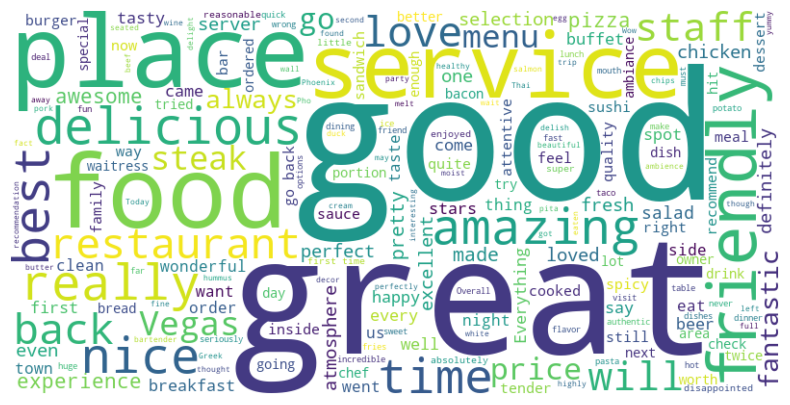

In [26]:
# import library
# positive review

from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_cloud = df.loc[df['Liked'] == 1,:]
text = ' '.join([text for text in word_cloud['Review']])
# Generate a WordCloud object
wordcloud = WordCloud(width=800, height=400,background_color='white').generate(text)
# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
#Criando um modelo de saco de palavras
#Neste código, criamos um modelo Bag of Words (BoW) a partir do 'corpus' de revisões de texto limpas.
#Importe a classe CountVectorizer do scikit-learn, que é usada para converter dados de texto em recursos numéricos.
from sklearn.feature_extraction.text import CountVectorizer

# Inicialize um CountVectorizer com um número máximo especificado de recursos (max_features).
# O parâmetro 'max_features' controla o número de palavras mais frequentes a serem mantidas no vocabulário.
# Ajuste esse valor com base em seus requisitos específicos.
cv = CountVectorizer(max_features=1500)

# Aplique o CountVectorizer ao 'corpus' para transformar os dados do texto em uma representação numérica.
# O método 'fit_transform' converte o texto em uma matriz esparsa onde as linhas representam avaliações e as colunas representam palavras.
X = cv.fit_transform(corpus).toarray()


# 'X' agora contém a representação BoW dos dados de texto.
# Extraia a variável de destino 'y' do DataFrame 'df'.
# Supondo que a variável alvo esteja localizada na segunda coluna (índice 1) do DataFrame.
y = df.iloc[:, 1].values

# 'y' agora contém os rótulos ou valores alvo correspondentes a cada revisão.
# Os 'X' e 'y' resultantes podem ser usados para treinar modelos de aprendizado de máquina para tarefas como análise de sentimento ou classificação de texto.


In [30]:
# Dividindo o conjunto de dados em conjuntos de treinamento e teste

# Neste código, dividimos o conjunto de dados em conjuntos de treinamento e teste para avaliar o desempenho de um modelo de aprendizado de máquina.

########################################################################################

from sklearn.model_selection import train_test_split

# Divida a matriz de recursos 'X' e a variável de destino 'y' em conjuntos de treinamento e teste.
# O parâmetro 'test_size' especifica a proporção do conjunto de dados a ser incluída na divisão de teste.
# Aqui, 20% dos dados são reservados para teste (test_size=0,20).
# O parâmetro 'random_state' garante a reprodutibilidade fixando a semente aleatória para a divisão.
# Isso significa que a mesma divisão será obtida toda vez que você executar o código com o mesmo valor random_state.

############################################################################################

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

################################################# #########################

# 'X_train' e 'y_train' contêm os recursos e rótulos do conjunto de treinamento, respectivamente.
# 'X_test' e 'y_test' contêm os recursos e rótulos do conjunto de testes, respectivamente.

# O conjunto de dados normalmente é dividido em um conjunto de treinamento (usado para treinar o modelo) e um conjunto de testes (usado para avaliar o desempenho do modelo).
# As proporções utilizadas nesta divisão podem ser ajustadas com base nos requisitos específicos da sua análise.

# Neste exemplo, o conjunto de dados contém 1.000 amostras e 80% (800 amostras) são usadas para treinamento,
# enquanto 20% (200 amostras) são usados para testes. Essas proporções podem ser modificadas conforme necessário.

In [31]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))


# **Treinamento de modelo**

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier,
)
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import (
    LogisticRegression, SGDClassifier, RidgeClassifier,
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
import numpy as np

# Define a dictionary of models with their names as keys and model instances as values
models = {
    'MultinomialNB': MultinomialNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC(),
    'LogisticRegression': LogisticRegression(),
    'SGDClassifier': SGDClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    
}

# Create an empty dictionary to store model accuracies
# ... Your code up to the loop ...

# Create an empty dictionary to store model accuracies and their differences
model_accuracies = {}
model_accuracies_diff = {}

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Loop through each model and train/evaluate it with k-fold cross-validation
for model_name, model in models.items():
    train_accuracies = []
    test_accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        train_accuracies.append(train_accuracy)
        test_accuracies.append(test_accuracy)
    
    # Calculate the average training and testing accuracy across all folds
    average_train_accuracy = np.mean(train_accuracies)
    average_test_accuracy = np.mean(test_accuracies)
    
    # Calculate the difference between training and testing accuracy
    accuracy_diff = abs(average_train_accuracy - average_test_accuracy)
    
    # Print training and testing accuracy for the model
    print(f"{model_name}: Training Accuracy={average_train_accuracy * 100:.2f}%, Testing Accuracy={average_test_accuracy * 100:.2f}%, Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("="*149)
    
    # Store the average testing accuracy and the difference in accuracies in the model_accuracies and model_accuracies_diff dictionaries
    model_accuracies[model_name] = average_test_accuracy
    model_accuracies_diff[model_name] = accuracy_diff

# Sort the models based on the absolute difference between training and testing accuracy
sorted_models = sorted(model_accuracies_diff.items(), key=lambda x: x[1])
print()
# Print the best models in ascending order of accuracy difference
print("︻"*149)
print()
print("Best Models (Closest Training and Testing Accuracy):")
print()
print("︻"*149)
print()
for model_name, accuracy_diff in sorted_models:
    print(f"{model_name}: Accuracy Difference={accuracy_diff * 100:.2f}%")
    print("-"*100)

# Print the model with the smallest accuracy difference (best model)
best_model_name = sorted_models[0][0]
print(f"The Best Model is: {best_model_name}")

MultinomialNB: Training Accuracy=93.36%, Testing Accuracy=78.31%, Accuracy Difference=15.06%
RandomForestClassifier: Training Accuracy=99.70%, Testing Accuracy=74.69%, Accuracy Difference=25.01%
GradientBoostingClassifier: Training Accuracy=83.65%, Testing Accuracy=76.20%, Accuracy Difference=7.45%
AdaBoostClassifier: Training Accuracy=81.43%, Testing Accuracy=75.40%, Accuracy Difference=6.03%
BaggingClassifier: Training Accuracy=97.04%, Testing Accuracy=71.90%, Accuracy Difference=25.14%
ExtraTreesClassifier: Training Accuracy=99.71%, Testing Accuracy=75.90%, Accuracy Difference=23.81%
SVC: Training Accuracy=96.24%, Testing Accuracy=77.10%, Accuracy Difference=19.14%
LinearSVC: Training Accuracy=99.22%, Testing Accuracy=77.70%, Accuracy Difference=21.52%
NuSVC: Training Accuracy=98.62%, Testing Accuracy=78.70%, Accuracy Difference=19.92%
LogisticRegression: Training Accuracy=96.03%, Testing Accuracy=78.21%, Accuracy Difference=17.82%
SGDClassifier: Training Accuracy=99.23%, Testing Ac

<h2><b>Como podemos ver no código acima... O MultinomialNB é o melhor modelo possível com maior precisão... então não há necessidade de treinar modelos com menor precisão no nosso caso</b></h2>

In [34]:
# Predicting the Test set results

y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k)
num_folds = 11

# Initialize a KFold cross-validator
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []

# Loop through each fold
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

    # Calculate precision, recall, and F1-score for the fold
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred)
    
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate and store the confusion matrix for the fold
    confusion = confusion_matrix(y_test, y_test_pred)
    confusion_matrices.append(confusion)

    # Generate and store the classification report for the fold
    classification = classification_report(y_test, y_test_pred)
    classification_reports.append(classification)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuracy_difference = np.mean(train_accuracy - test_accuracies)
# Calculate the average precision, recall, and F1-score
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

# Print the results
print("AdaBoostClassifier Results:")
print("-"*150)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("-"*150)
print(f"Average Accuracies Difference: {average_accuracy_difference * 100:.2f}%")
print("-"*150)
print(f"Average Precision: {average_precision:.2f}")
print("-"*150)
print(f"Average Recall: {average_recall:.2f}")
print("-"*150)
print(f"Average F1-score: {average_f1:.2f}")
print("-"*150)

AdaBoostClassifier Results:
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Training Accuracy: 81.43%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Testing Accuracy: 75.40%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Accuracies Difference: 6.36%
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Precision: 0.85
------------------------------------------------------------------------------------------------------------------------------------------------------
Average Recall: 0.62
--------------------------------------------------------------------

In [36]:
# Calculate and store the confusion matrix for the fold
confusion = confusion_matrix(y_test, y_test_pred)
confusion_matrices.append(confusion)

# Print the confusion matrix for the current fold
print(f"Confusion Matrix - Fold {len(confusion_matrices)}:\n{confusion}")

Confusion Matrix - Fold 12:
[[39  3]
 [20 28]]


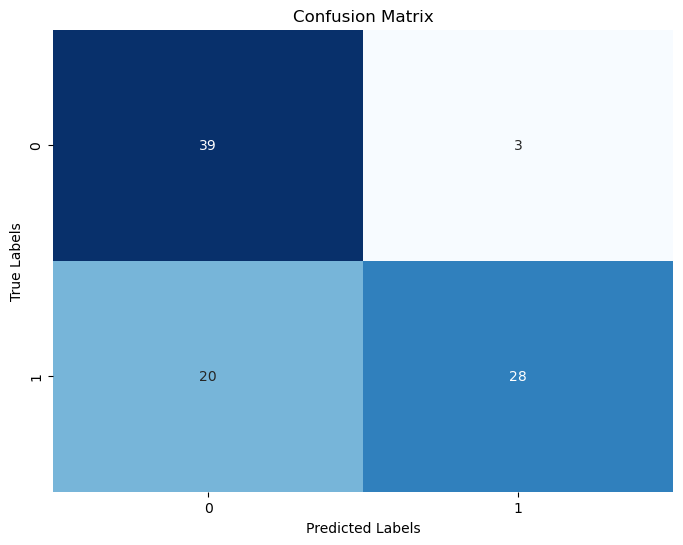

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [38]:
# Generate and store the classification report for the fold
classification = classification_report(y_test, y_test_pred)
classification_reports.append(classification)

# Print the classification report for the current fold
print(f"Classification Report - Fold {len(classification_reports)}:\n{classification}")

Classification Report - Fold 12:
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        42
           1       0.90      0.58      0.71        48

    accuracy                           0.74        90
   macro avg       0.78      0.76      0.74        90
weighted avg       0.79      0.74      0.74        90



<h2><b>HyperParameterTune the NaiveBayesClassifier</b></h2>

<h2>Usando Kfold estratificado</h2>

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 81.55%
Average Testing Accuracy: 76.00%
Average Accuracy Difference: 4.63%


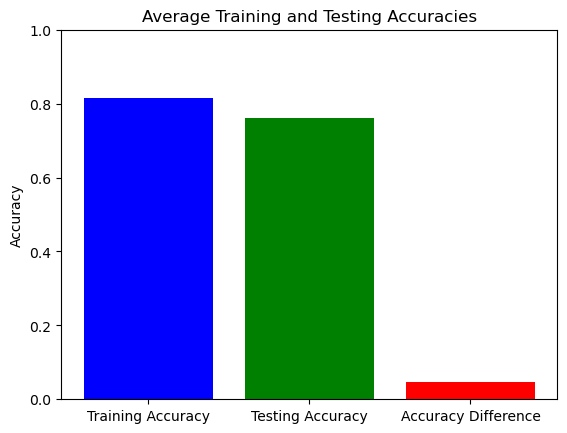

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Load your data (X and y) here

# Create an AdaBoostClassifier instance
ada_boost_classifier = AdaBoostClassifier()

# Specify the number of folds (k) and use StratifiedKFold
num_folds = 5
stratified_kf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Lists to store metrics for each fold
train_accuracies = []
test_accuracies = []

# Loop through each fold
for train_index, test_index in stratified_kf.split(X, y):  # Notice the addition of 'y'
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the AdaBoostClassifier on the training data
    ada_boost_classifier.fit(X_train, y_train)

    # Make predictions on the training data
    y_train_pred = ada_boost_classifier.predict(X_train)

    # Calculate training accuracy for the fold
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Make predictions on the testing data
    y_test_pred = ada_boost_classifier.predict(X_test)

    # Calculate testing accuracy for the fold
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

# Calculate the average training and testing accuracies
average_train_accuracy = np.mean(train_accuracies)
average_test_accuracy = np.mean(test_accuracies)
average_accuaracy_difference = np.mean(train_accuracy - test_accuracies)
# Print the results
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuaracy_difference * 100:.2f}%")
print("="*149)

import matplotlib.pyplot as plt

# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuaracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()

# **Previsões**

In [40]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def predict_sentiment(sample_review, ada_boost_classifier, cv):
    # Preprocess the sample review
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    # Transform the preprocessed review using the CountVectorizer (cv)
    temp = cv.transform([final_review]).toarray()

    # Use the pre-trained classifier to predict sentiment
    sentiment = ada_boost_classifier.predict(temp)

    return sentiment[0]  # Return the predicted sentiment (assuming it's a single value)

In [41]:
# Sample reviews as strings
reviews = [
    'The food is really bad.',
    'I love their delicious dishes!',
    'Terrible experience. Avoid this place.',
    'The service was excellent.',
    'Worst place ever, but nice food'
]

# Assuming you have already defined the 'predict_sentiment' function, classifier, and cv

for review in reviews:
    sentiment = predict_sentiment(review, ada_boost_classifier, cv)
    if sentiment:
        sentiment_label = 'POSITIVE'
    else:
        sentiment_label = 'NEGATIVE'

    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment_label}")
    print()

Review: 'The food is really bad.'
Sentiment: NEGATIVE

Review: 'I love their delicious dishes!'
Sentiment: POSITIVE

Review: 'Terrible experience. Avoid this place.'
Sentiment: NEGATIVE

Review: 'The service was excellent.'
Sentiment: POSITIVE

Review: 'Worst place ever, but nice food'
Sentiment: NEGATIVE



# Precisão geral

AdaBoostClassifier Results with Stratified k-fold Cross-Validation:
Average Training Accuracy: 81.55%
Average Testing Accuracy: 76.00%
Average Accuracy Difference: 4.63%


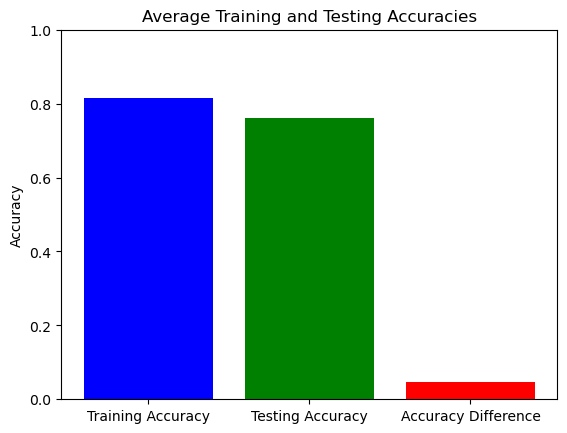

In [42]:
print("AdaBoostClassifier Results with Stratified k-fold Cross-Validation:")
print("="*149)
print(f"Average Training Accuracy: {average_train_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Testing Accuracy: {average_test_accuracy * 100:.2f}%")
print("="*149)
print(f"Average Accuracy Difference: {average_accuaracy_difference * 100:.2f}%")
print("="*149)



# Create a bar plot
categories = ['Training Accuracy', 'Testing Accuracy', 'Accuracy Difference']
values = [average_train_accuracy, average_test_accuracy, average_accuaracy_difference]
plt.bar(categories, values, color=['blue', 'green', 'red'])
plt.ylabel('Accuracy')
plt.title('Average Training and Testing Accuracies')
plt.ylim(0, 1.0)  # Set the y-axis limits between 0 and 1
plt.show()